In [1]:
# usamos libreria de Algebra Linear
using LinearAlgebra

## Seteo de frecuencias características (parámetros)

In [2]:
# Definimos frecuencias caracteristicas
Δ = Float64(-100); println("Δ = ",Δ);
Ω = abs(Δ/100); println("Ω = Δ/5 = ",Ω);
println("ħ=1")

Δ = -100.0
Ω = Δ/5 = 1.0


ħ=1


In [3]:
# Definimos el hamiltoniano a diagonalizar
H = Matrix{Float64}(undef, 3, 3) # creamos matriz
H[:,:] = zeros(3,3)              # inicializamos matriz
H[1,1] = -Δ; H[1,2] = Ω; H[1,3] = Ω;
H[2,1] = H[1,2] ; H[3,1] = H[1,3];

In [4]:
# Mostramos en pantalla el hamiltoniano
println("H="); H

H=


3×3 Matrix{Float64}:
 100.0  1.0  1.0
   1.0  0.0  0.0
   1.0  0.0  0.0

In [5]:
# calculamos las autoenergías del hamiltoniano (autovalores)
H_eigenvals = copy(eigvals(H))

3-element Vector{Float64}:
  -0.01999600159920045
  -3.331780473496622e-40
 100.01999600159921

In [6]:
# calculamos los autoestados del hamiltonioano (autovectores)
H_eigenvectors = copy(eigvecs(H))

3×3 Matrix{Float64}:
  0.0141379   0.0       -0.9999
 -0.707036   -0.707107  -0.009997
 -0.707036    0.707107  -0.009997

In [7]:
println(H_eigenvectors[2,1])

-0.7070361093749231


In [8]:
# Almacenamos los autoestados y autoenergías en variables (en el caso de que sean útiles después)
ϕ1 = copy(H_eigenvectors[:,1]); ϵ1= H_eigenvals[1]; # primer autoestado y autoenergía
ϕ2 = copy(H_eigenvectors[:,2]); ϵ2= H_eigenvals[2]; # segundo autoestado y autoenergía
ϕ3 = copy(H_eigenvectors[:,3]); ϵ3= H_eigenvals[3]; # tercer autoestado y autoenergía

In [9]:
# definimos el estado inicial (fundamental), estado auxiliar y estado excitado
g=[Float64(0),Float64(1),Float64(0)]; # vector columna (estado inicial)
a=[Float64(1),Float64(0),Float64(0)]; # vector columna (estado auxiliar)
e=[Float64(0),Float64(0),Float64(1)]; # vector columna (estado excitado)

# creamos vector de tiempos
# tiempo inicial, tiempo final y numero de pasos
t_start=Float64(0);t_end=300.0;n=Int32(1000);
# calculamos paso temporal
Δt= abs(t_end-t_start)/Float64(n-1);
# creamos vector de tiempos
time_vector = [(t_start+Δt*Float64(i-1)) for i in 1:n];

## Creamos una función de evolución
### Ecuación de schröedinger dependiente del tiempo

In [10]:
# Calculamos cuál es la descomposición del estado inicial en la base de autoestados del hamiltoniano B:={|ϕj⟩}
# |ψ0⟩=∑aj|ϕj⟩ := estado inicial (vector columna)

function lineal_superposition(H_eigenvectors,ϕ)
    # vector columna de coeficientes de descomposición coeff_vector := [a1,a2,a3]
    coeff_vector = zero(Array{ComplexF64}(undef,length(H_eigenvectors[1,:])))
    coeff_vector = inv(H_eigenvectors)*ϕ
    return coeff_vector
end

lineal_superposition (generic function with 1 method)

In [11]:
# Realizamos la evolución temporal el hamiltoniano
# |ψ(t)⟩=∑exp[-i⋅ϵj⋅(t-t0)]|ψ0⟩

function evolution(ψ0::Array{Float64},H_eigenvals::Array{Float64},H_eigenvectors::Matrix{Float64},time_vector::Array{Float64})

    # vector columna de coeficientes de descomposición coeff_vector := [a1,a2,a3]
    coeff_vect = lineal_superposition(H_eigenvectors,ψ0)

    dim_time = length(time_vector)
    dim_eigvecs = length(H_eigenvectors[1,:])
    dim_eigvals = length(H_eigenvals)

    ψt = zeros(ComplexF64, dim_eigvecs, dim_time);

    for i in 1:dim_time
        for j in 1:dim_eigvecs
            for k in 1:dim_eigvals
                ψt[k,i]=exp(-im*H_eigenvals[k]*(time_vector[i]-time_vector[1]))*coeff_vect[k]*H_eigenvectors[j,k]
            end
        end
    end
    return ψt
end

evolution (generic function with 1 method)

## Realizamos la evolución del sistema con los parámetros específicos

In [12]:
ψ_t=evolution(g,H_eigenvals,H_eigenvectors,time_vector) # con estado inicial |ψ0⟩=|g⟩
#ψ_t=evolution(e,H_eigenvals,H_eigenvectors,time_vector) # con estado inicial |ψ0⟩=|e⟩

3×1000 Matrix{ComplexF64}:
   0.4999+0.0im    0.499891+0.00300178im   …     0.479821-0.140255im
     -0.5-0.0im        -0.5-5.00267e-41im            -0.5-4.99767e-38im
 9.994e-5-0.0im  1.89633e-5+9.81244e-5im      -7.97197e-5+6.02726e-5im

### Calculamos las poblaciones $p(t)$ de los estados $|e⟩$, $|g⟩$ y $|a⟩$;

In [13]:
# calculamos valores útiles
dim_time = length(time_vector)
dim_eigvecs = length(H_eigenvectors[1,:])

# definimos vector de probabilidades (población del estado excitado)
pe=Array{ComplexF64}(undef, dim_time); # vector complejo
# vector de coeficientes aj tq |e⟩=∑aj|ϕj⟩, con |ϕj⟩ := base de autoestados de H
coeff_vect_e = lineal_superposition(H_eigenvectors,e);

# definimos vector de probabilidades (población del estado fundamental)
pg=Array{ComplexF64}(undef, dim_time);
# vector de coeficientes aj tq |g⟩=∑aj|ϕj⟩, con |ϕj⟩ := base de autoestados de H
coeff_vect_g = lineal_superposition(H_eigenvectors,g);

# definimos vector de probabilidades (población del estado auxiliar)
pa=Array{ComplexF64}(undef, dim_time);
# vector de coeficientes aj tq |a⟩=∑aj|ϕj⟩, con |ϕj⟩ := base de autoestados de H
coeff_vect_a = lineal_superposition(H_eigenvectors,a);

for i in 1:dim_time
    ψ_t[:,i]=ψ_t[:,i]/norm(ψ_t[:,i]);     # normalizamos la vector de estado

    pe[i]=adjoint(coeff_vect_e)*ψ_t[:,i]; # computamos ⟨e|ψt⟩=[∑(aj)*⟨ϕj|][∑bk|ϕk⟩]
    pe[i]=abs(pe[i])*abs(pe[i])           # computamos |⟨e|ψt⟩|²

    pg[i]=adjoint(coeff_vect_g)*ψ_t[:,i]; # computamos ⟨g|ψt⟩=[∑(aj)*⟨ϕj|][∑bk|ϕk⟩]
    pg[i]=abs(pg[i])*abs(pg[i])           # computamos |⟨g|ψt⟩|²

    pa[i]=adjoint(coeff_vect_a)*ψ_t[:,i]; # computamos ⟨a|ψt⟩=[∑(aj)*⟨ϕj|][∑bk|ϕk⟩]
    pa[i]=abs(pa[i])*abs(pa[i])           # computamos |⟨a|ψt⟩|²
end

### Ploteamos los resultados

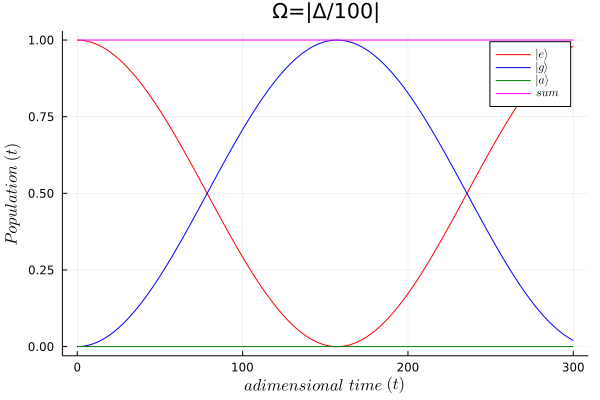

In [14]:
using Plots
plt = plot()
plot!(plt, time_vector, real(pe), color = :red, label = "\$|e⟩\$")
plot!(plt, time_vector, real(pg), color = :blue, label = "\$|g⟩\$")
plot!(plt, time_vector, real(pa), color = :green, label = "\$|a⟩\$")
plot!(plt, time_vector, real(pe)+real(pg)+real(pa), color = :magenta, label = "\$sum\$")
plot!(ylabel = "\$Population\$ \$(t)\$", xlabel = "\$adimensional\$ \$time\$ \$(t)\$")
plot!(title = "Ω=|Δ/100|")
plot!(plt, legend = :topright)
#png(plot!(plt, legend = :topright), "./plots/lambda_configuration_04.png")

# Referencias

La implementación realizada es básica con lo visto en MCI pero podemos revisar un poco lo que ya está hecho en lenguaje Julia para cálculos relacionados a óptica cuántica en los siguientes enlaces (pero utiliza operadores tensoriales y espacios de Hilbert):

+ [https://docs.qojulia.org/](https://docs.qojulia.org/)
+ [https://docs.qojulia.org/examples/raman/](https://docs.qojulia.org/examples/raman/)

Otra información útil puede ser

+ [https://physics.stackexchange.com/questions/274770/holonomy-of-lambda-configuration-hamiltonian](https://physics.stackexchange.com/questions/274770/holonomy-of-lambda-configuration-hamiltonian)
+ [https://journals.aps.org/pra/pdf/10.1103/PhysRevA.66.032309](https://journals.aps.org/pra/pdf/10.1103/PhysRevA.66.032309)
+ [https://arxiv.org/ftp/arxiv/papers/0909/0909.3958.pdf](https://arxiv.org/ftp/arxiv/papers/0909/0909.3958.pdf)
